In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn import preprocessing
import os

COLAB = True

In [2]:
RANDOM_STATE = 30255
NUM_EPOCHS = 3

if COLAB:
  drive.mount('/content/gdrive')
  PATH = "gdrive/Shareddrives/Adv ML Project/Data/"
  df = pd.read_csv(os.path.join(PATH + "preprocessed_data.csv"))

else:
  df = pd.read_csv('../data/preprocessed_data.csv')
  df = df.sample(n=100, random_state=RANDOM_STATE).reset_index()


le = preprocessing.LabelEncoder()
le.fit(df['CLASS'])
df['LABEL'] = le.transform(df['CLASS'])

df.head()

Mounted at /content/gdrive


,DESCRIPTION,SUBJECT,MAIN_SUBJECT,CLASS,BERT_TOKENIZED,SPACY_PREPROCESSED,LABEL
0,The United States Department of Energy Vehicle...,"['33 Advanced Propulsion Systems', '36 Materia...",33 Advanced Propulsion Systems,"Energy Storage, Conversion, and Utilization","{'input_ids': tensor([[ 101, 1996, 2142, 2...",united states department energy vehicle techno...,0
1,Solar reflective “cool pavements” have been pr...,"['32 Energy Conservation, Consumption, And Uti...","32 Energy Conservation, Consumption, And Utili...","Energy Storage, Conversion, and Utilization","{'input_ids': tensor([[ 101, 5943, 21346, 1...",solar reflective cool pavement propose potenti...,0
2,Inconel 718 alloy is used extensively in aerog...,"['36 Materials Science', '33 Advanced Propulsi...",33 Advanced Propulsion Systems,"Energy Storage, Conversion, and Utilization","{'input_ids': tensor([[ 101, 4297, 5643, 2...",inconel alloy extensively aerogas turbine allo...,0
3,The Production Tax Credit (PTC) and the Invest...,"['29 Energy Planning, Policy, And Economy', 'P...","29 Energy Planning, Policy, And Economy","Energy Storage, Conversion, and Utilization","{'input_ids': tensor([[ 101, 1996, 2537, 4...",production tax credit ptc investment tax credi...,0
4,The production tax credit (PTC) promotes wind ...,"['29 Energy Planning, Policy, And Economy', '1...","29 Energy Planning, Policy, And Economy","Energy Storage, Conversion, and Utilization","{'input_ids': tensor([[ 101, 1996, 2537, 4...",production tax credit ptc promote wind energy ...,0


In [3]:
X = df['SPACY_PREPROCESSED']
y = df['LABEL']

In [4]:
# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

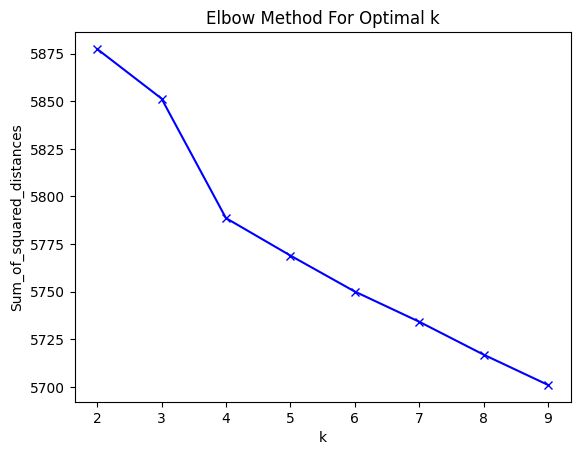

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl= pd.DataFrame(list(zip(list(y),labels)),columns=['category','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

      category  cluster
3355         2        0
5052         4        0
1543         1        0
3851         3        0
3850         3        0
...        ...      ...
1343         1        3
3948         3        3
3947         3        3
3978         3        3
1873         1        3

[6115 rows x 2 columns]


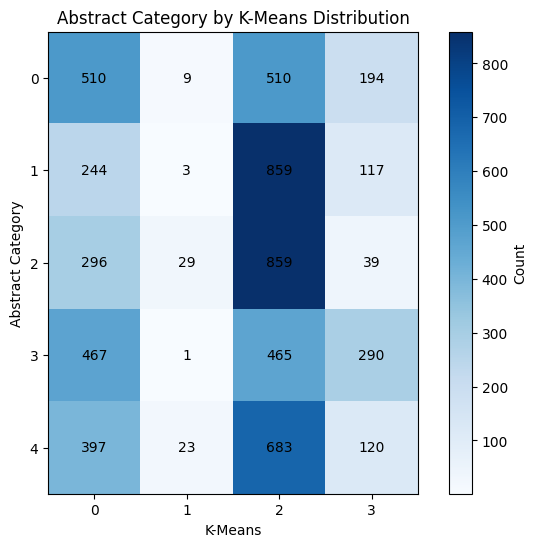

In [25]:
cross_tab = pd.crosstab(wiki_cl['category'], wiki_cl['cluster'])
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cross_tab.values, cmap='Blues')

# Set x-axis and y-axis labels
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)

# Add colorbar
plt.colorbar(label='Count')

# Add value annotations
for i in range(len(cross_tab.index)):
    for j in range(len(cross_tab.columns)):
        plt.text(j, i, cross_tab.values[i, j], ha='center', va='center')

# Set plot title and labels
plt.title('Abstract Category by K-Means Distribution')
plt.xlabel('K-Means')
plt.ylabel('Abstract Category')

# Display the plot
plt.show()

Cluster: 0


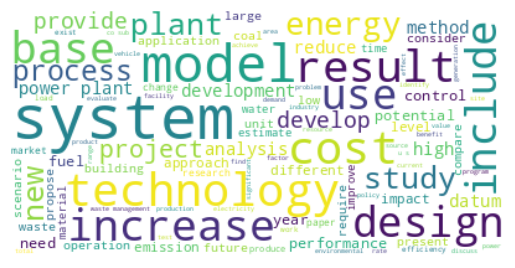

Cluster: 1


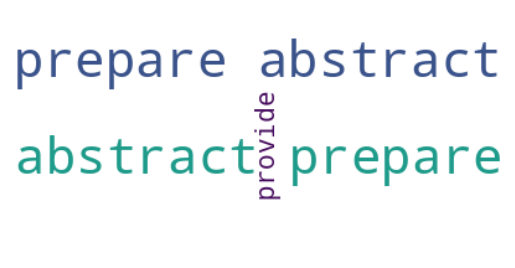

Cluster: 2


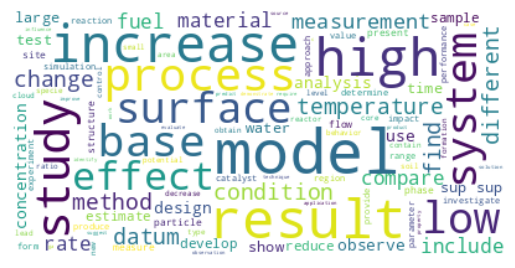

Cluster: 3


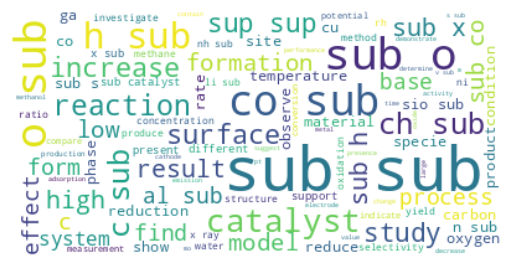

In [21]:
from wordcloud import WordCloud
result={'cluster':labels,'abstract': list(df['SPACY_PREPROCESSED'])}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['abstract'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
  #  print('Titles')
  #  titles=wiki_cl[wiki_cl.cluster==k]['title']         
  #  print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()